Chennai House Price Prediction

Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Data
The historical sale data is available here.

Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate. **bold text**

DATASET LINK=https://docs.google.com/document/d/1R_fqWoLPTUJDuktxU55KKfuiBZyQMfn53sEyImq6gJY/edit

**Importing all necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
#import dataset
df=pd.read_csv('train-chennai-sale.csv')

In [ ]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**INITIAL OBSERVATIONS ON DATASET:**
1. TOTAL NO OF ROWS AND COLUMNS : 7109, 22
2. THREE COLUMNS HAVE NAN VALUES 'QS_OVERALL', N BATHROOM and N BEDROOM
3. FOUR COLUMNS ARE NOT REQUIRED FOR CREATING ML MODEL.ONE IS ID COLUMNS AND OTHER THREE COLUMNS ARE NOT REQUIRED
4. FEW COLUMNS ARE NOT IN THE RIGHT DATATYPE *bold text*

## **DATA CLEANING:**

In [ ]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**First looking for Null or NAN values in Dataset:**

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**In this dataset, N BATHROOM has 5 and N BEDROOM has 1 Nan values, respectively, and QS OVERALL has a total of 48 Nan.**

In [ ]:
# Either we discard it or we fill a value with mode.
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)

In [ ]:
df.N_BATHROOM.dtype
df.N_BEDROOM.dtype

dtype('float64')

In [ ]:
# Similarly for N_Bathroom
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)

**Although they are in a FLOAT DATATYPE, N BATHROOM & N BEDROOM SHOULD BOTH BE IN INTEGER. A CHANGE IN DATATYPE IS NECESSARY**

In [ ]:
# Changing DATA TYPE to 'int'
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

**A conclusion that can be drawn from the dataset is that the columns "PRT ID," "QS ROOMS," "QS BATHROOM," "QS BEDROOM," and "QS OVERALL" are not necessary for building the machine learning model, and it is also ineffective.**

In [ ]:
#dropping the unneccesary columns
df.drop(columns=['PRT_ID','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],inplace=True)

In [ ]:
df.shape

(7109, 17)

In [ ]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

**Our dataset no longer contains null or nan values or unnecessary columns.**

**# COLUMN BY COLUMN DATA CLEANING**

**1. AREA**

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

There are more duplicates in this column as a result of spelling errors. Use the REPLACE function to make the necessary corrections.

In [ ]:
#replacing duplicates
replacing_duplicates={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
df['AREA']=df['AREA'].replace(replacing_duplicates)

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

2. **N_BEDROOM & 3. N_BATHROOM**

In [ ]:
df.N_BEDROOM.value_counts()


1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [ ]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

**4. SALE_COND Column**

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
#replacing duplicates
df=df.replace(to_replace=['Ab Normal'],value='AbNormal')
df=df.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['AdjLand'],value='Adj Land')

In [ ]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**5. PARK_FACIL**

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df=df.replace(to_replace=['Noo'],value='No')

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**6.BUILDTYPE**

In [ ]:
#finding the unique elements of the column
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
map={'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE']=df['BUILDTYPE'].replace(map)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**7. UTILITY_AVAIL:**

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
df.UTILITY_AVAIL.value_counts()

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

**8. STREET:**

In [ ]:
#finding the unique elements of the column
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
#replacing duplicates
map2={'Pavd':'Paved','NoAccess':'No Access'}
df['STREET']=df['STREET'].replace(map2)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**9. MZZONE**

In [ ]:
#finding the unique elements of the column
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**10. REG_FEE & 11. COMMIS Column**

These columns, REG FEE & COMMIS, are unnecessary because they have no impact on sales beforehand. So i'm dropping this column

In [ ]:
df= df.drop(["REG_FEE", "COMMIS"], axis=1)

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE'],
      dtype='object')

**14.N_ROOM**

In [ ]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

**12. DATE_SALE  & 13. DATE_BUILD**

In [ ]:
df.DATE_SALE.dtype
df.DATE_BUILD.dtype

dtype('O')

In [ ]:
#converting these two columns' object datatypes to date/time formats
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [ ]:
df["DATE_SALE"][0]

Timestamp('2011-04-05 00:00:00')

In [ ]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250


In [ ]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  SALES_PRICE    7109 non-null   int64         
dtypes: datetime64[ns](2),

**Our data is now clean. There are no nan values or unnecessary columns.**

# **FEATURE ENGINEERING:**

**We can determine the age of a house using these two columns DATE_SALE & DATE_BUILD. So,  I'm creating a new column called "AGE OF BUILDING."**

In [ ]:
df['AGE_OF_BUILDING']=(df['DATE_SALE']-df['DATE_BUILD'])/np.timedelta64(1,'Y')
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,43.891387
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,10.992697
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,19.581511
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,21.985393
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,29.574871


In [ ]:
#Changing the datatype of the age from the float to int
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,29


We no longer require the DATE SALE and DATE BUILD columns.

In [ ]:
df=df.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

In [ ]:
# Now our data is ready for modelling.
df.to_csv('cleaned_data_chp ')

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,AGE_OF_BUILDING
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,1.089491e+07,23.550710
std,457.410902,57.403110,0.802881,0.409534,1.019099,3.768603e+06,12.435546
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,8.272100e+06,13.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.299390e+07,33.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.366734e+07,55.000000


In [ ]:
df["SALES_PRICE"].max()


23667340

In [ ]:
df.SALES_PRICE.mean()

10894909.63918976

In [ ]:
df.to_csv('guvi_app')

**OBSERVATIONS:**
1. There are no outliers in INT_SQFT, DIST_MAINROAD, AGE_OF_BUILDING COLUMNS.
2. There is outliers in Sales price. But it is valid outliers.

# **EXPLORATARY DATA ANALYSIS:**

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

**Initial Observations:**
Our data has totally 4 continous variable data and rest all others are categorical data.

Text(0.5, 1.0, 'Area Wise Sales')

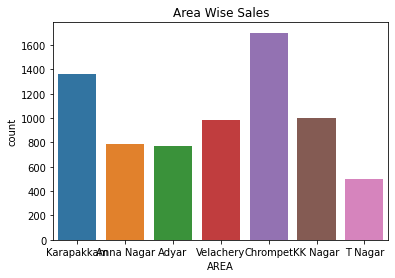

In [ ]:
sns.countplot(data=df,x='AREA')
plt.title('Area Wise Sales')

OBSERVATIONS:
MOST NO.OF.SALES AREA WISE:
1. CHROMPET
2. KARAPAKKAM
3. KK NAGAR
4. VELACHERY
5. ANNA NAGAR
6. ADAYAR
7. T NAGAR

Text(0.5, 1.0, 'Sales Condition')

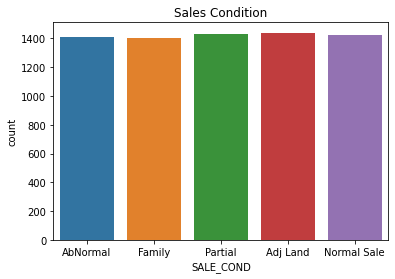

In [ ]:
sns.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

Text(0.5, 1.0, 'Parking Facility')

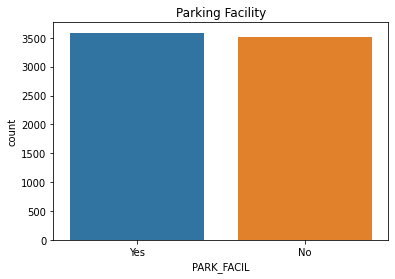

In [ ]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

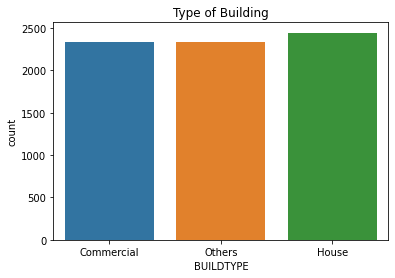

In [ ]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Utility Available')

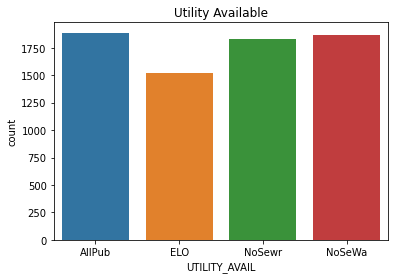

In [ ]:
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

Text(0.5, 1.0, 'Street Type')

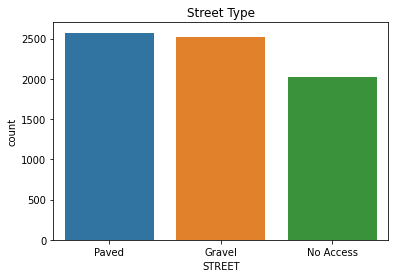

In [ ]:
sns.countplot(data=df,x='STREET')
plt.title('Street Type')

Text(0.5, 1.0, 'Zones of Chennai')

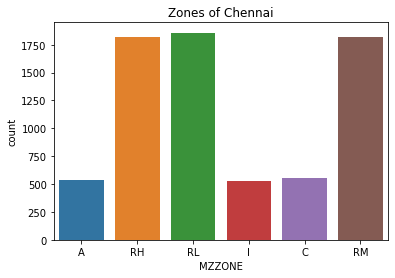

In [ ]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No of Bedrooms')

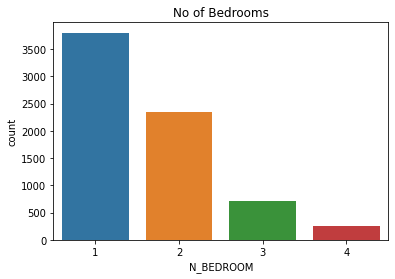

In [ ]:
sns.countplot(df['N_BEDROOM'])
plt.title('No of Bedrooms')

SINGLE BED ROOM HOUSES GOT SOLD MORE. AS NO.OF BEDROOM INCRESES TOTAL NO.OF HOUSES SOLD DECRESES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'N_BATHROOM')

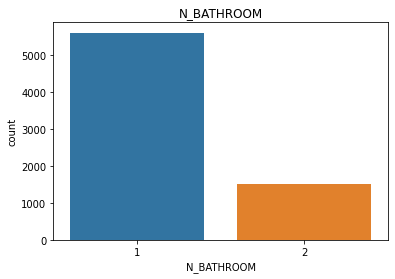

In [ ]:
sns.countplot(df['N_BATHROOM'])
plt.title('N_BATHROOM')

# **ENCODING:**

**ORDINAL LABEL ENCODING:**

> For AREA, SALE COND,UTILITY_AVAIL,STREET AND MZ ZONE, we apply ordinal label encoding.



In [ ]:
df1=df

In [ ]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,31


In [ ]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,31


In [ ]:
df1["AREA"] = df1["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

df1["SALE_COND"] = df1["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"Adj Land" : 4})

df1["UTILITY_AVAIL"] = df1["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})

df1["STREET"] = df1["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})

df1["MZZONE"] = df1["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [ ]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,0,1004,131,1,1,3,2,Yes,Commercial,3,1,0,7600000,43
1,5,1986,26,2,1,5,2,No,Commercial,3,2,3,21717770,10
2,1,909,70,1,1,3,2,Yes,Commercial,0,2,4,13159200,19
3,3,1855,14,3,2,5,1,No,Others,2,1,2,9630290,21
4,0,1226,84,1,1,3,2,Yes,Others,3,2,1,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,No,Others,0,0,5,5353000,49
7105,3,1897,52,3,2,5,1,Yes,Others,1,0,3,10818480,8
7106,3,1614,152,2,1,4,3,No,House,1,2,2,8351410,28
7107,0,787,40,1,1,2,0,Yes,Commercial,0,1,4,8507000,31


In [ ]:
# Label Encoding (Binary Categorical Feature)
df1["PARK_FACIL"] = df1["PARK_FACIL"].replace({"No": 0, "Yes": 1})

In [ ]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,0,1004,131,1,1,3,2,1,Commercial,3,1,0,7600000,43
1,5,1986,26,2,1,5,2,0,Commercial,3,2,3,21717770,10
2,1,909,70,1,1,3,2,1,Commercial,0,2,4,13159200,19
3,3,1855,14,3,2,5,1,0,Others,2,1,2,9630290,21
4,0,1226,84,1,1,3,2,1,Others,3,2,1,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,Others,0,0,5,5353000,49
7105,3,1897,52,3,2,5,1,1,Others,1,0,3,10818480,8
7106,3,1614,152,2,1,4,3,0,House,1,2,2,8351410,28
7107,0,787,40,1,1,2,0,1,Commercial,0,1,4,8507000,31


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AREA             7109 non-null   int64 
 1   INT_SQFT         7109 non-null   int64 
 2   DIST_MAINROAD    7109 non-null   int64 
 3   N_BEDROOM        7109 non-null   int64 
 4   N_BATHROOM       7109 non-null   int64 
 5   N_ROOM           7109 non-null   int64 
 6   SALE_COND        7109 non-null   int64 
 7   PARK_FACIL       7109 non-null   int64 
 8   BUILDTYPE        7109 non-null   object
 9   UTILITY_AVAIL    7109 non-null   int64 
 10  STREET           7109 non-null   int64 
 11  MZZONE           7109 non-null   int64 
 12  SALES_PRICE      7109 non-null   int64 
 13  AGE_OF_BUILDING  7109 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 777.7+ KB


Other than buildtype, all other feautures are ready for deploying machine learning models

**ONE-HOT ENCODING:**

In [ ]:
df1 = pd.get_dummies(df1, columns=["BUILDTYPE"])

In [ ]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,2,1,3,1,0,7600000,43,1,0,0
1,5,1986,26,2,1,5,2,0,3,2,3,21717770,10,1,0,0
2,1,909,70,1,1,3,2,1,0,2,4,13159200,19,1,0,0
3,3,1855,14,3,2,5,1,0,2,1,2,9630290,21,0,0,1
4,0,1226,84,1,1,3,2,1,3,2,1,7406250,29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,0,0,5,5353000,49,0,0,1
7105,3,1897,52,3,2,5,1,1,1,0,3,10818480,8,0,0,1
7106,3,1614,152,2,1,4,3,0,1,2,2,8351410,28,0,1,0
7107,0,787,40,1,1,2,0,1,0,1,4,8507000,31,1,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DIST_MAINROAD         7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   UTILITY_AVAIL         7109 non-null   int64
 9   STREET                7109 non-null   int64
 10  MZZONE                7109 non-null   int64
 11  SALES_PRICE           7109 non-null   int64
 12  AGE_OF_BUILDING       7109 non-null   int64
 13  BUILDTYPE_Commercial  7109 non-null   uint8
 14  BUILDTYPE_House       7109 non-null   uint8
 15  BUILDTYPE_Others      7109 non-null   uint8
dtypes: int

In [ ]:
df1.to_csv("cleaned_data")

**Now that we have all the data we need, we can start applying the machine learning models.**

# **SPLITTING THE DATASET:**

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']

In [ ]:
X.shape

(7109, 15)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(5687, 15)

In [ ]:
x_test.shape

(1422, 15)

### **MACHINE LEARNING MODELS:**

# **1. LINEAR REGRESSION:**

In [ ]:
 #importing all the required functions
from sklearn.linear_model import LinearRegression

In [ ]:
#Building the Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#FINAL PREDICTIONS:
y_pred = lr.predict(x_test)
y_pred

array([11091124.8745102 , 14341919.88292453, 14623300.50667736, ...,
        6552550.83069074,  8662481.23908957, 15556856.56411188])

In [ ]:
#RESULTS---ACTUAL VS PREDICTED
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
6107,9866820,1.109112e+07
6964,14238410,1.434192e+07
6580,13547020,1.462330e+07
1036,14048900,1.423862e+07
1469,7439700,6.308869e+06
...,...,...
6279,12181500,1.207401e+07
6190,13491940,1.388860e+07
1828,6408750,6.552551e+06
5125,9387600,8.662481e+06


In [ ]:
#EVALUVATING THE MODEL:
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.91 %


# **2. K-NEAREST NEIGHBOUR MODEL**

SCALING IS MANDATORY FOR THIS MODEL:

In [ ]:
# Scaling the test and train data

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.9291306332655316
K value  :  2  score :  0.9291306332655316
K value  :  3  score :  0.9291306332655316
K value  :  4  score :  0.9291306332655316
K value  :  5  score :  0.9291306332655316
K value  :  6  score :  0.9291306332655316
K value  :  7  score :  0.9291306332655316
K value  :  8  score :  0.9291306332655316
K value  :  9  score :  0.9291306332655316
K value  :  10  score :  0.9291306332655316
K value  :  20  score :  0.9291306332655316
K value  :  40  score :  0.9291306332655316
K value  :  50  score :  0.9291306332655316
K value  :  80  score :  0.9291306332655316
K value  :  100  score :  0.9291306332655316


In [ ]:
# FITTING THE MODEL

from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([10542380., 12481780., 13309742., ...,  7489203.,  9858544.,
       13868852.])

In [ ]:
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

,Actual,Predicted
6107,9866820,10542380.0
6964,14238410,12481780.0
6580,13547020,13309742.0
1036,14048900,12211110.0
1469,7439700,7260563.0
...,...,...
6279,12181500,11531093.0
6190,13491940,12341484.0
1828,6408750,7489203.0
5125,9387600,9858544.0


In [ ]:
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 94.43 %
